<a href="https://colab.research.google.com/github/SriNithin965/cognizant_internship/blob/main/Sme_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the packages

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset

In [49]:
data = pd.read_csv('https://raw.githubusercontent.com/SriNithin965/cognizant_internship/main/AAPL.csv')

In [73]:
data.head(10)

,Open
0,6.473214
1,6.433571
2,6.117857
3,6.342143
4,6.285714
5,6.340000
6,6.347143
7,5.901071
8,5.768214
9,5.775357


In [51]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

changing the data type of date column

In [52]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Visualization

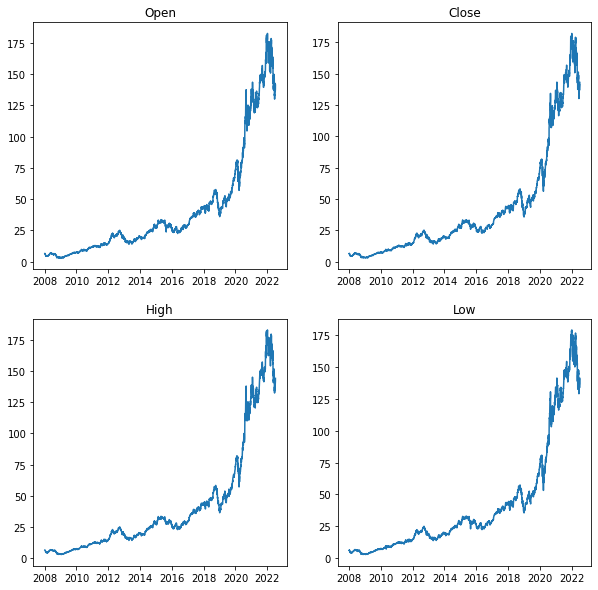

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.title('Open')
plt.plot(data['Date'],data['Open'])
plt.subplot(2, 2, 2)
plt.title('Close')
plt.plot(data['Date'],data['Close'])
plt.subplot(2, 2, 3)
plt.title('High')
plt.plot(data['Date'],data['High'])
plt.subplot(2, 2, 4)
plt.title('Low')
plt.plot(data['Date'],data['Low'])
plt.show()

In [79]:
data = data[['Open']]
data.head(10)

,Open
0,6.473214
1,6.433571
2,6.117857
3,6.342143
4,6.285714
5,6.340000
6,6.347143
7,5.901071
8,5.768214
9,5.775357


In [80]:
len(data)

3650

In [81]:
training_size=int(len(data)*0.80)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [82]:
len(train_data),len(test_data)

(2920, 730)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_trans_train=scaler.fit_transform(np.array(train_data).reshape(-1,1))
data_trans_test=scaler.fit_transform(np.array(test_data).reshape(-1,1))
data_trans_train
data_trans_test

In [84]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		end_ix = i + n_features
		if end_ix > len(timeseries_data)-1:
			break
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [85]:
window_size = 5
n_features = 1
X_train,y_train = prepare_data(data_trans_train,window_size)
X_test,y_test = prepare_data(data_trans_test,window_size)

In [86]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [88]:
print(X_train.shape)
print(X_test.shape)

(2915, 5, 1)
(725, 5, 1)


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [90]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
92/92 [==============================] - 3s 7ms/step - loss: 0.0433
Epoch 2/100
92/92 [==============================] - 1s 7ms/step - loss: 1.9536e-04
Epoch 3/100
92/92 [==============================] - 1s 7ms/step - loss: 1.8382e-04
Epoch 4/100
92/92 [==============================] - 1s 8ms/step - loss: 1.6603e-04
Epoch 5/100
92/92 [==============================] - 1s 8ms/step - loss: 1.8100e-04
Epoch 6/100
92/92 [==============================] - 1s 8ms/step - loss: 1.7384e-04
Epoch 7/100
92/92 [==============================] - 1s 8ms/step - loss: 1.7225e-04
Epoch 8/100
92/92 [==============================] - 1s 8ms/step - loss: 1.7223e-04
Epoch 9/100
92/92 [==============================] - 1s 7ms/step - loss: 1.8497e-04
Epoch 10/100
92/92 [==============================] - 1s 7ms/step - loss: 1.7012e-04
Epoch 11/100
92/92 [==============================] - 1s 7ms/step - loss: 1.7099e-04
Epoch 12/100
92/92 [==============================] - 1s 7ms/step - loss: 1.86

Validation

In [91]:
predict_X=model.predict(X_test)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,predict_X))

0.022440521390677353

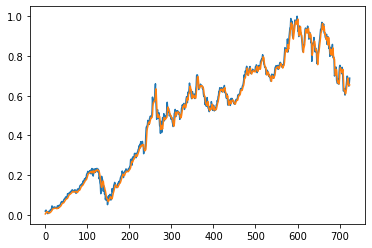

In [92]:
plt.plot(y_test)
plt.plot(predict_X)
plt.show()

Future Prediction

In [ ]:
last_five = data_trans_test[len(data_trans_test)-5:]
i=0
future_stock =[]
while(i<20):
  last_five = last_five.reshape(1,5,1)
  value = model.predict(last_five)
  stock=scaler.inverse_transform(value)
  future_stock.append(stock[0][0])
  last_five = last_five.reshape(1,5)
  last_five = last_five[0,1:]
  last_five = np.append(last_five,value)
  i=i+1
future_stock

BYE OR SELL STOCK

In [115]:
def byeorsell(stock):
  avg = 0
  sum = 0
  for i in range(len(stock)-1):
    sum = sum + stock[i+1]-stock[i]
  avg = sum/len(stock)-1
  if(avg<0):
    print('Sell')
  else:
    print('bye')
byeorsell(future_stock)

Sell
